# Activity 2

## 2.1 Sub-activity: Graph creation

### Task 1, 2 and 3

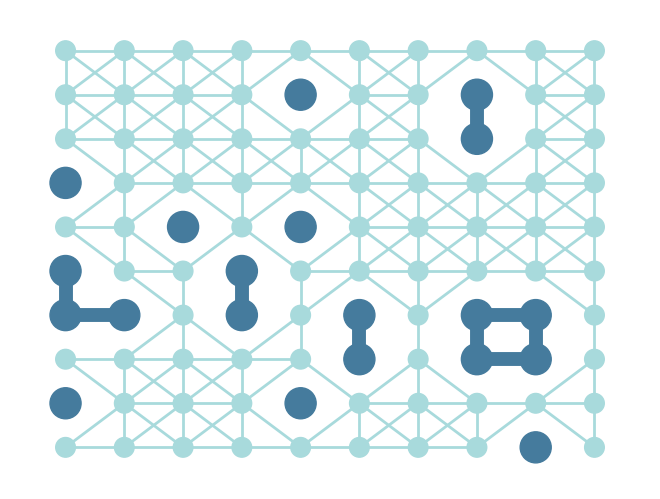

In [2]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
import random

COLOUR_BG = "#a8dadc"
COLOUR_FG = "#457b9d"
SIZE_BG_NODES = 200 # i've changed the sizes slightly as it didn't look like the question for me when using the given values
SIZE_FG_NODES = 500
EDGE_BG_WEIGHT = 2
EDGE_FG_WEIGHT = 10
MATRIX_SIDE = 10
NO_FG_NODES = 20
FIG_SIZE = (12, 12)

# Task 1:
g = nx.Graph()  # declares a new graph
for x in range(MATRIX_SIDE):  # using matrix side size (10), create a grid of background nodes
    for y in range(MATRIX_SIDE):
        g.add_node((x, y), color=COLOUR_BG)  # adds nodes

# Task 2:
fg_nodes = random.sample(list(g.nodes()), NO_FG_NODES) # sample takes in list of nodes, and 
for node in fg_nodes:
    g.nodes[node]['color'] = COLOUR_FG

# Task 3:
def get_weight(node_colour):  # function to determine which edge size to use (foreground or background). takes in node colour
    if node_colour == COLOUR_BG:
        return EDGE_BG_WEIGHT
    else:
        return EDGE_FG_WEIGHT

def connect_nodes(g, current_node, neighbour):  # function to connect the horizontal nodes (for foreground and background)
    x, y = current_node # pos of current node
    ni, nj = neighbour # pos of neighbour
    if 0 <= ni < MATRIX_SIDE and 0 <= nj < MATRIX_SIDE: # make sure that neighbour is within matrix bounds
        neighbor_node_type = g.nodes[neighbour]['color'] # get neighbour type
        weight = get_weight(current_node_type) # call weight function to get edge weight (thickness of line)
        if current_node_type == neighbor_node_type: # if neighbours are same type, draw edge
            g.add_edge(current_node, (ni, nj), weight=weight)

def connect_nodes_diagonal(g, current_node, neighbour): # function to connect diagonal nodes (for background only)
    x, y = current_node
    ni, nj = neighbour
    if 0 <= ni < MATRIX_SIDE and 0 <= nj < MATRIX_SIDE: # make sure neighbour is in bound of matrix
        neighbour_node_type = g.nodes[(ni, nj)]['color'] # get neighbour type (colour)
        if neighbour_node_type == COLOUR_BG: # if neighbours same type, draw edge
            g.add_edge(current_node, (ni, nj), weight=EDGE_BG_WEIGHT)

for x in range(MATRIX_SIDE): # iterate x and y through matrix
    for y in range(MATRIX_SIDE):
        current_node = (x, y) # get current node in graph
        current_node_type = g.nodes[current_node]['color'] # colour determines node type (foreground or background)
        
        connect_nodes(g, current_node, (x-1, y)) # connect_nodes function takes in the graph, the current x,y position in the graph, and a neighbour. this connects with top neighbor
        connect_nodes(g, current_node, (x+1, y)) # neighbour below
        connect_nodes(g, current_node, (x, y-1)) # left neighbour
        connect_nodes(g, current_node, (x, y+1)) # right neighbour

        if current_node_type == COLOUR_BG: # only call function for background nodes
            connect_nodes_diagonal(g, current_node, (x-1, y-1)) # upper left neighbour
            connect_nodes_diagonal(g, current_node, (x-1, y+1)) # upper right neighbour
            connect_nodes_diagonal(g, current_node, (x+1, y-1)) # bottom left neighbour
            connect_nodes_diagonal(g, current_node, (x+1, y+1)) # bottom right neighbour

edge_weights = [] # declare list of weights for drawing
edge_colours = [] # declare list of edges for drawing

for edge in g.edges(): # iterate through each edge in the graph 
    edge_colours.append(g.nodes[edge[0]]['color']) # get list of the colours for each node (to make sure the edge colour is correct)
    edge_weights.append(g[edge[0]][edge[1]]['weight']) # get a list of all the edge weights (for nx draw). [0] refers to the original node and [1] refers to the node it's conencted to.
    
node_sizes = [] # declare list of all node sizes
node_colours = [] # declare list of all node colours

for node in g.nodes(): # iterate through each node
    if g.nodes[node]['color'] == COLOUR_FG: # get size of node depending on colour
        node_sizes.append(SIZE_FG_NODES) #append to list
    else:
        node_sizes.append(SIZE_BG_NODES) # also get size of node depending on colour
    node_colours.append(g.nodes[node]['color']) # append node colours

# Documentation used for drawing: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html
pos = {}
for x, y in g.nodes(): # this gets the posiitions of the nodes
    pos[(x, y)] = (y, -x) # it is convention to flip the graph so the origin is in the top left corner (from documentation)
    
nx.draw(g, pos, with_labels=False, node_size=node_sizes, node_color=node_colours, font_size=8, width=edge_weights, edge_color=edge_colours) #draw graph
plt.show()

### Task 4

In [11]:
# Task 4:
print(g) # nx.info() causes an error.

density = nx.density(g)
print(f"Graph Density: {density:.4f}") # prints graph density to 4 decimal places

degree_centrality = nx.degree_centrality(g) # gets the degree centrality (which measures how import and a node is)
print("Degree Centrality:")
for node, centrality in degree_centrality.items(): # iterate through each node
    print(f"Node {node}: {centrality:.4f}") #print centrality to 4 decimal places

Graph with 100 nodes and 217 edges
Graph Density: 0.0438
Degree Centrality:
Node (0, 0): 0.0303
Node (0, 1): 0.0404
Node (0, 2): 0.0404
Node (0, 3): 0.0404
Node (0, 4): 0.0505
Node (0, 5): 0.0505
Node (0, 6): 0.0404
Node (0, 7): 0.0000
Node (0, 8): 0.0404
Node (0, 9): 0.0303
Node (1, 0): 0.0505
Node (1, 1): 0.0707
Node (1, 2): 0.0000
Node (1, 3): 0.0606
Node (1, 4): 0.0707
Node (1, 5): 0.0707
Node (1, 6): 0.0606
Node (1, 7): 0.0505
Node (1, 8): 0.0606
Node (1, 9): 0.0404
Node (2, 0): 0.0505
Node (2, 1): 0.0606
Node (2, 2): 0.0505
Node (2, 3): 0.0000
Node (2, 4): 0.0707
Node (2, 5): 0.0606
Node (2, 6): 0.0101
Node (2, 7): 0.0505
Node (2, 8): 0.0000
Node (2, 9): 0.0404
Node (3, 0): 0.0505
Node (3, 1): 0.0707
Node (3, 2): 0.0000
Node (3, 3): 0.0606
Node (3, 4): 0.0707
Node (3, 5): 0.0606
Node (3, 6): 0.0101
Node (3, 7): 0.0303
Node (3, 8): 0.0505
Node (3, 9): 0.0303
Node (4, 0): 0.0505
Node (4, 1): 0.0707
Node (4, 2): 0.0707
Node (4, 3): 0.0707
Node (4, 4): 0.0707
Node (4, 5): 0.0606
Node

### Task 5

In [12]:
# Task 5:
from networkx.readwrite import json_graph
import json

data = json_graph.node_link_data(g) # returns dictionary of of the graph in json format
json_data = json.dumps(data, indent=4) # converts to json string with an indent of 4 (to make it the format asked in the question)

json_file_path = "masterpiece.json" # creates json file
with open(json_file_path, "w") as json_file: 
    json_file.write(json_data) #writes json_data to json file
